## Table of contents

### 01. Importing libraries and data
-Cleaning data
### 02. The elbow Technique

### 03. K-means clustering
-Scatterplots

-Conclusion
### 04. Descriptive statistics
-What could these results be useful for?

# 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [4]:
#Creating folder path
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '
path

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '

In [8]:
#Importing data
citidf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikeclean_3.csv'), index_col = False)

### Cleaning data

In [9]:
citidf.head()

,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,4,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [6]:
# Dropping column 'Unnamed: 0'

citidf = citidf.drop(columns = ['Unnamed: 0'])

In [7]:
# Checking column names 

citidf.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [47]:
# Creating a subset

sub = citidf[['start_hour','start_station_id','end_station_id','trip_duration', 'birth_year']]

# 02. Elbow technique

In [59]:
num_cl = range(1, 10) # define the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters
# in the range we assigned above

In [60]:
# Creating a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

[-15800621712.048754,
 -11042834992.783587,
 -7294844822.335903,
 -3868105636.915989,
 -2898304589.24697,
 -2527272553.4645286,
 -2339336902.6499634,
 -2162496883.103119,
 -2011606808.9641361]

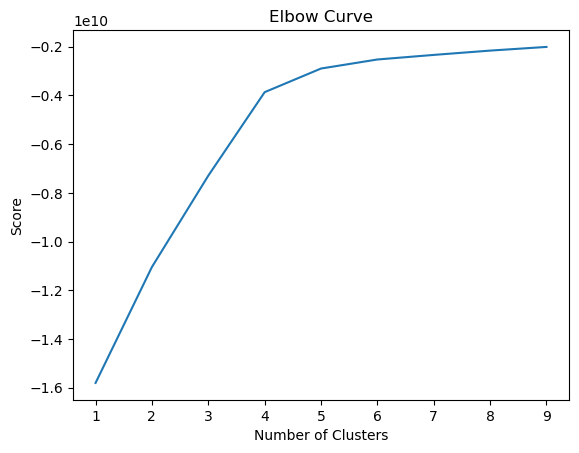

In [61]:
# Plotting the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this graph we can see that it jumps four on the X-axis and increases slightly at five. So, the optimal number of clusters is four.

# 03. k-Means Clustering

In [62]:
# Creating the k-means object
kmeans = KMeans(n_clusters=4)

In [63]:
# Fitting the k-means object to the data
kmeans.fit(sub)

/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [64]:
# Performing clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

/Users/katherinevaldivia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/kp/9p8z9q3x6113kvlh8pwcxm1r0000gn/T/ipykernel_79240/817097520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [65]:
sub.head()

,start_hour,start_station_id,end_station_id,trip_duration,birth_year,clusters
0,18,523,334,993,1968.0,1
1,18,257,236,581,1983.0,0
2,19,479,513,361,1989.0,0
3,11,527,441,561,1988.0,0
4,22,293,432,427,1986.0,0


In [66]:
# Checking the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

0    27159
1    11377
2     1249
3     1232
Name: clusters, dtype: int64

### Scatterplots

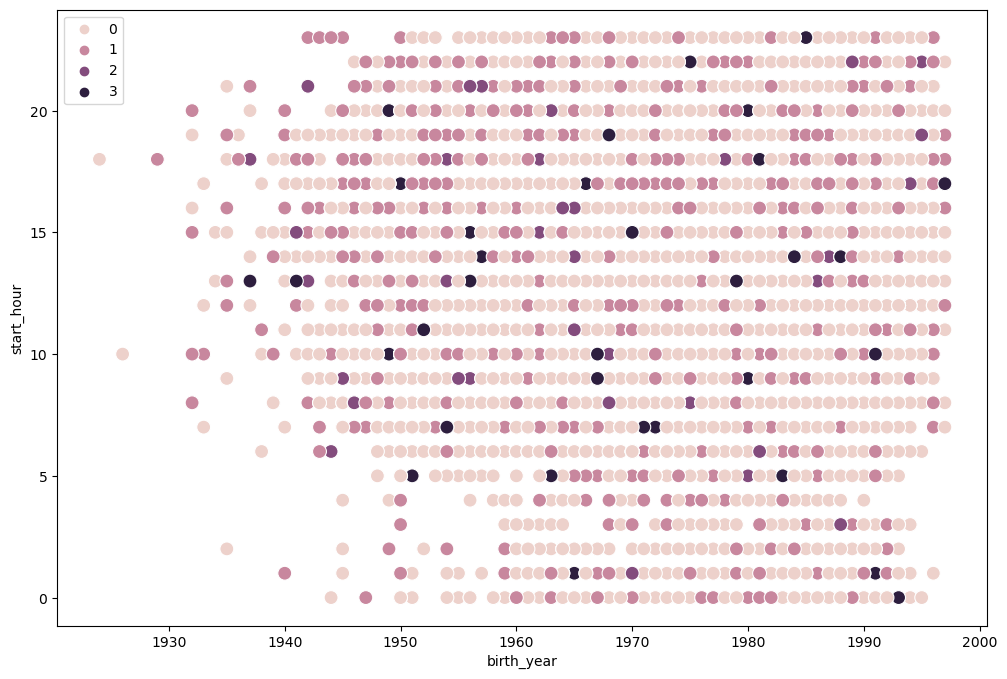

In [67]:
# Plot the clusters for variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['birth_year'], y = sub['start_hour'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('birth_year')
plt.ylabel('start_hour')
plt.show()

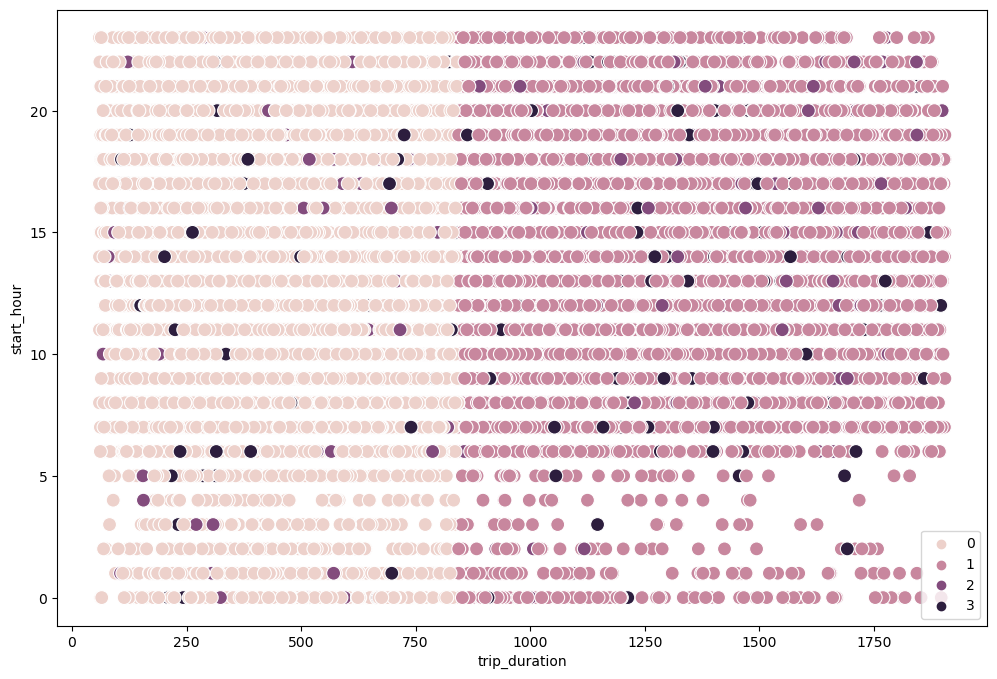

In [68]:
# Plot the clusters for variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['trip_duration'], y = sub['start_hour'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('trip_duration')
plt.ylabel('start_hour')
plt.show()

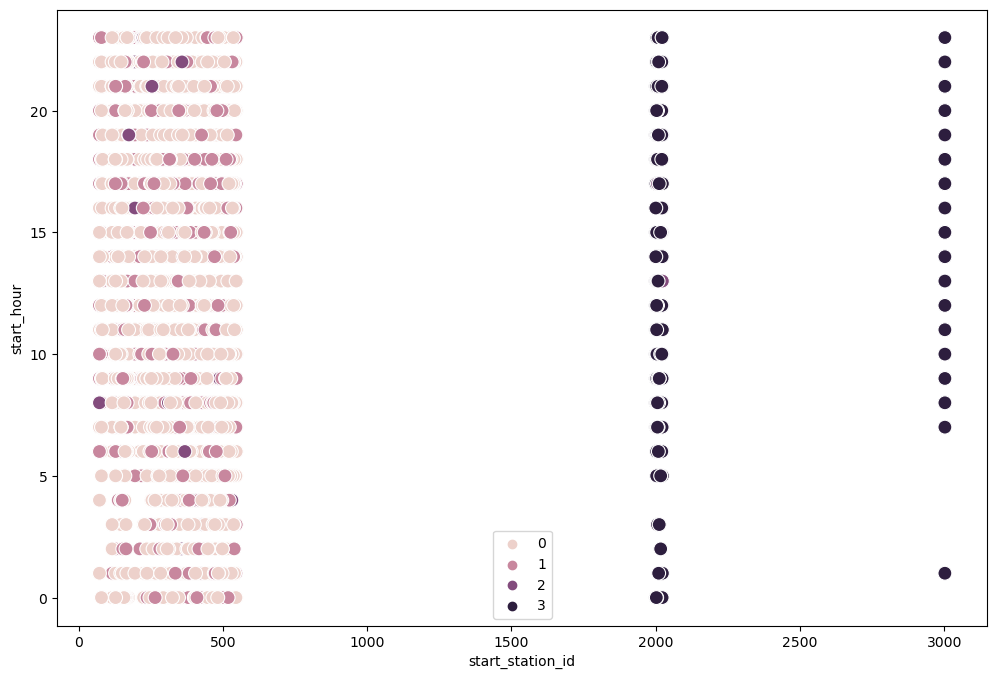

In [69]:
# Plot the clusters for variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['start_station_id'], y = sub['start_hour'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('start_station_id')
plt.ylabel('start_hour')
plt.show()

# 04. Descriptive statistics

In [70]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'lightpink'

/var/folders/kp/9p8z9q3x6113kvlh8pwcxm1r0000gn/T/ipykernel_79240/2823479106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark'


In [71]:
sub.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'start_station_id':['mean', 'median'], 
                         'end_station_id':['mean', 'median'],
                         'trip_duration':['mean', 'median'],
                         'birth_year' :['mean', 'median']})

start_hour        start_station_id         end_station_id          \
                mean median             mean  median           mean  median   
cluster                                                                       
dark       14.148539   15.0      2159.943182  2012.0     393.465097   398.0   
lightpink  13.918038   15.0       379.394602   394.0     379.820870   396.0   
pink       14.400018   15.0       379.006153   397.0     378.082887   393.0   
purple     14.026421   15.0       460.072858   407.0    2138.614892  2010.0   

          trip_duration           birth_year          
                   mean  median         mean  median  
cluster                                               
dark         780.838474   691.5  1975.491883  1978.0  
lightpink    472.881733   464.0  1975.937884  1978.0  
pink        1212.094313  1149.0  1975.318801  1978.0  
purple       779.124900   674.0  1975.797438  1978.0

Dark cluster (3), Lightpink cluster (2), Pink cluster (1), Purple cluster (0) the average start hour is 14 or 2pm, the median start hour is 15 or 3pm.



## What could these results be useful for?

The results for the start hour could be useful in figuring the average time people start using citibikes. 

The variables that I could use for the clusters were limited since I had more categorical variabls than numerical variables. Some of the numerical variables were not useful.

When plotting the clusters for the numerical variables like start_hour and trip_duration there were alot of light pink and pink clusters. 